# Part I - (Dataset Exploration Title)
## by Laura Marino

## Introduction
> Introduce the dataset

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [15]:
# load in the dataset into a pandas dataframe
flights = pd.read_csv('flights_reporting.csv')

In [16]:
# high-level overview of data shape and composition
print(flights.shape)
print(flights.dtypes)

(361428, 22)
YEAR                     int64
QUARTER                  int64
MONTH                    int64
FL_DATE                 object
OP_UNIQUE_CARRIER       object
OP_CARRIER_FL_NUM        int64
ORIGIN_AIRPORT_ID        int64
ORIGIN                  object
ORIGIN_CITY_NAME        object
DEST_AIRPORT_ID          int64
DEST                    object
DEST_CITY_NAME          object
ARR_TIME               float64
ARR_DELAY              float64
CANCELLED              float64
DIVERTED               float64
DISTANCE               float64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
dtype: object


In [29]:
flights.head(10)

,YEAR,QUARTER,MONTH,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,...,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2021,1,1,1/17/2021 12:00:00 AM,DL,1089,11298,DFW,"Dallas/Fort Worth, TX",11433,...,1536.0,13.0,0.0,0.0,986.0,NaN,NaN,NaN,NaN,NaN
1,2021,1,1,1/17/2021 12:00:00 AM,DL,1090,14747,SEA,"Seattle, WA",14869,...,1005.0,-14.0,0.0,0.0,689.0,NaN,NaN,NaN,NaN,NaN
2,2021,1,1,1/17/2021 12:00:00 AM,DL,1091,14869,SLC,"Salt Lake City, UT",14747,...,1116.0,-13.0,0.0,0.0,689.0,NaN,NaN,NaN,NaN,NaN
3,2021,1,1,1/17/2021 12:00:00 AM,DL,1092,14027,PBI,"West Palm Beach/Palm Beach, FL",11433,...,1526.0,-18.0,0.0,0.0,1086.0,NaN,NaN,NaN,NaN,NaN
4,2021,1,1,1/17/2021 12:00:00 AM,DL,1093,11433,DTW,"Detroit, MI",15304,...,1140.0,14.0,0.0,0.0,983.0,NaN,NaN,NaN,NaN,NaN
5,2021,1,1,1/17/2021 12:00:00 AM,DL,1093,15304,TPA,"Tampa, FL",11433,...,1507.0,-18.0,0.0,0.0,983.0,NaN,NaN,NaN,NaN,NaN
6,2021,1,1,1/17/2021 12:00:00 AM,DL,1094,12953,LGA,"New York, NY",13204,...,945.0,-11.0,0.0,0.0,950.0,NaN,NaN,NaN,NaN,NaN
7,2021,1,1,1/17/2021 12:00:00 AM,DL,1094,13204,MCO,"Orlando, FL",12953,...,1318.0,-23.0,0.0,0.0,950.0,NaN,NaN,NaN,NaN,NaN
8,2021,1,1,1/17/2021 12:00:00 AM,DL,1095,15304,TPA,"Tampa, FL",11433,...,2211.0,-26.0,0.0,0.0,983.0,NaN,NaN,NaN,NaN,NaN
9,2021,1,1,1/17/2021 12:00:00 AM,DL,1096,14869,SLC,"Salt Lake City, UT",14747,...,1619.0,-17.0,0.0,0.0,689.0,NaN,NaN,NaN,NaN,NaN


In [30]:
flights.tail(10)

,YEAR,QUARTER,MONTH,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,...,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
361418,2021,1,1,1/10/2021 12:00:00 AM,AA,2806,11298,DFW,"Dallas/Fort Worth, TX",13487,...,2143.0,-5.0,0.0,0.0,852.0,NaN,NaN,NaN,NaN,NaN
361419,2021,1,1,1/11/2021 12:00:00 AM,AA,2806,11298,DFW,"Dallas/Fort Worth, TX",13487,...,2255.0,-21.0,0.0,0.0,852.0,NaN,NaN,NaN,NaN,NaN
361420,2021,1,1,1/12/2021 12:00:00 AM,AA,2806,11298,DFW,"Dallas/Fort Worth, TX",13487,...,2259.0,-17.0,0.0,0.0,852.0,NaN,NaN,NaN,NaN,NaN
361421,2021,1,1,1/13/2021 12:00:00 AM,AA,2806,11298,DFW,"Dallas/Fort Worth, TX",13487,...,2301.0,-15.0,0.0,0.0,852.0,NaN,NaN,NaN,NaN,NaN
361422,2021,1,1,1/14/2021 12:00:00 AM,AA,2806,11298,DFW,"Dallas/Fort Worth, TX",13487,...,2250.0,-26.0,0.0,0.0,852.0,NaN,NaN,NaN,NaN,NaN
361423,2021,1,1,1/15/2021 12:00:00 AM,AA,2806,11298,DFW,"Dallas/Fort Worth, TX",13487,...,134.0,226.0,0.0,0.0,852.0,226.0,0.0,0.0,0.0,0.0
361424,2021,1,1,1/16/2021 12:00:00 AM,AA,2806,11298,DFW,"Dallas/Fort Worth, TX",13487,...,2254.0,-22.0,0.0,0.0,852.0,NaN,NaN,NaN,NaN,NaN
361425,2021,1,1,1/17/2021 12:00:00 AM,AA,2806,11298,DFW,"Dallas/Fort Worth, TX",13487,...,2157.0,9.0,0.0,0.0,852.0,NaN,NaN,NaN,NaN,NaN
361426,2021,1,1,1/18/2021 12:00:00 AM,AA,2806,11298,DFW,"Dallas/Fort Worth, TX",13487,...,2257.0,-19.0,0.0,0.0,852.0,NaN,NaN,NaN,NaN,NaN
361427,2021,1,1,1/19/2021 12:00:00 AM,AA,2806,11298,DFW,"Dallas/Fort Worth, TX",13487,...,2307.0,-9.0,0.0,0.0,852.0,NaN,NaN,NaN,NaN,NaN


In [14]:
flights.nunique()

year                      1
quarter                   1
month                     1
fl_date                  31
op_carrier_fl_num      6622
origin                  357
origin_city_name        351
dest                    357
dest_city_name          351
arr_time               1395
arr_delay               847
cancelled                 2
diverted                  2
distance               1370
carrier_delay           589
weather_delay           401
nas_delay               340
security_delay           78
late_aircraft_delay     401
dtype: int64

In [151]:
print(flights_clean.year.unique())
print(flights_clean.quarter.unique())
print(flights_clean.month.unique())

[2021]
[1]
[1]


In [25]:
flights.describe()

,YEAR,QUARTER,MONTH,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,361428.0,361428.0,361428.0,361428.000000,361428.000000,361428.000000,357691.000000,357204.000000,361428.000000,361428.000000,361428.000000,34961.000000,34961.000000,34961.000000,34961.000000,34961.000000
mean,2021.0,1.0,1.0,2783.941524,12641.752548,12641.803646,1489.310587,-5.260106,0.010091,0.001596,796.937949,26.877978,6.531163,16.590973,0.220446,15.138755
std,0.0,0.0,0.0,1810.245625,1555.995551,1555.961056,458.962453,42.150287,0.099944,0.039924,560.423897,80.536493,53.354049,38.747728,4.966547,50.529717
min,2021.0,1.0,1.0,1.000000,10135.000000,10135.000000,1.000000,-86.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021.0,1.0,1.0,1191.000000,11292.000000,11292.000000,1129.000000,-20.000000,0.000000,0.000000,385.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2021.0,1.0,1.0,2461.000000,12478.000000,12478.000000,1513.000000,-11.000000,0.000000,0.000000,667.000000,0.000000,0.000000,2.000000,0.000000,0.000000
75%,2021.0,1.0,1.0,4494.000000,14082.000000,14082.000000,1849.000000,-1.000000,0.000000,0.000000,1044.000000,25.000000,0.000000,20.000000,0.000000,6.000000
max,2021.0,1.0,1.0,8798.000000,16869.000000,16869.000000,2400.000000,2565.000000,1.000000,1.000000,5095.000000,2554.000000,1315.000000,1286.000000,414.000000,2069.000000


In [66]:
sum(flights.duplicated())

0

In [117]:
flights_clean = flights.copy()

Some of the data quality and tidiness issues to fix are:
- lower case the column names
- drop columns 'op_unique_carrier', 'origin_airport_id','dest_airport_id','arr_time' as they are not relevant for our analysis. We have the column arr_delay which adds more value because it tells difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.
- Also drop columns year, month and quarter as they are all the same. This dataset contains data only for January 2021
- Split city name from state name in columns 'origin_city_name' and 'dest_city_name'
- rename column names from "origin" to "origin_airport and "dest" to "dest_airport"
- replace 0.0 values by NaN in 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'
- convert cancelled to boolean


In [118]:
# rename Pandas columns to lower case
flights_clean.columns= flights_clean.columns.str.lower()
flights_clean.columns

Index(['year', 'quarter', 'month', 'fl_date', 'op_unique_carrier',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'arr_time', 'arr_delay',
       'cancelled', 'diverted', 'distance', 'carrier_delay', 'weather_delay',
       'nas_delay', 'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [119]:
#I will drop the columns I will not use. OP unique carrier, airport IDs and arrival time --'op_unique_carrier'

flights_clean.drop(['origin_airport_id','dest_airport_id','arr_time'],  axis=1, inplace=True)

In [168]:

flights_clean.drop(['year','quarter', 'month'],  axis=1, inplace=True)

KeyError: "['year' 'quarter'] not found in axis"

In [120]:
#change fl_date format to datetime
flights_clean['fl_date'] = pd.to_datetime(flights_clean['fl_date'])

In [121]:
print(flights_clean['fl_date'].max())
print(flights_clean['fl_date'].min())

2021-01-31 00:00:00
2021-01-01 00:00:00


In [170]:
flights_clean['day'] = pd.DatetimeIndex(flights_clean['fl_date']).day
flights_clean.head()

,month,fl_date,op_unique_carrier,op_carrier_fl_num,origin_airport,dest_airport,arr_delay,cancelled,diverted,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,origin_city,destiny_city,origin_state,destiny_state,day
0,1,2021-01-17,DL,1089,DFW,DTW,13.0,0.0,0.0,986.0,NaN,NaN,NaN,NaN,NaN,Dallas/Fort Worth,Detroit,TX,MI,17
1,1,2021-01-17,DL,1090,SEA,SLC,-14.0,0.0,0.0,689.0,NaN,NaN,NaN,NaN,NaN,Seattle,Salt Lake City,WA,UT,17
2,1,2021-01-17,DL,1091,SLC,SEA,-13.0,0.0,0.0,689.0,NaN,NaN,NaN,NaN,NaN,Salt Lake City,Seattle,UT,WA,17
3,1,2021-01-17,DL,1092,PBI,DTW,-18.0,0.0,0.0,1086.0,NaN,NaN,NaN,NaN,NaN,West Palm Beach/Palm Beach,Detroit,FL,MI,17
4,1,2021-01-17,DL,1093,DTW,TPA,14.0,0.0,0.0,983.0,NaN,NaN,NaN,NaN,NaN,Detroit,Tampa,MI,FL,17


In [122]:
flights_clean['origin_city'] = flights_clean['origin_city_name'].str.extract('(.+?),')
flights_clean['destiny_city'] = flights_clean['dest_city_name'].str.extract('(.+?),')
flights_clean['origin_state'] = flights_clean['origin_city_name'].str[-2:]
flights_clean['destiny_state'] = flights_clean['dest_city_name'].str[-2:]

In [123]:
flights_clean.rename(columns={'origin': 'origin_airport', 'dest': 'dest_airport'}, inplace=True)

In [124]:
flights_clean.head()

,year,quarter,month,fl_date,op_unique_carrier,op_carrier_fl_num,origin_airport,origin_city_name,dest_airport,dest_city_name,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,origin_city,destiny_city,origin_state,destiny_state
0,2021,1,1,2021-01-17,DL,1089,DFW,"Dallas/Fort Worth, TX",DTW,"Detroit, MI",...,986.0,NaN,NaN,NaN,NaN,NaN,Dallas/Fort Worth,Detroit,TX,MI
1,2021,1,1,2021-01-17,DL,1090,SEA,"Seattle, WA",SLC,"Salt Lake City, UT",...,689.0,NaN,NaN,NaN,NaN,NaN,Seattle,Salt Lake City,WA,UT
2,2021,1,1,2021-01-17,DL,1091,SLC,"Salt Lake City, UT",SEA,"Seattle, WA",...,689.0,NaN,NaN,NaN,NaN,NaN,Salt Lake City,Seattle,UT,WA
3,2021,1,1,2021-01-17,DL,1092,PBI,"West Palm Beach/Palm Beach, FL",DTW,"Detroit, MI",...,1086.0,NaN,NaN,NaN,NaN,NaN,West Palm Beach/Palm Beach,Detroit,FL,MI
4,2021,1,1,2021-01-17,DL,1093,DTW,"Detroit, MI",TPA,"Tampa, FL",...,983.0,NaN,NaN,NaN,NaN,NaN,Detroit,Tampa,MI,FL


In [125]:
print(flights_clean.origin_state.unique())
print(flights_clean.destiny_state.unique())


['TX' 'WA' 'UT' 'FL' 'MI' 'NY' 'GA' 'CA' 'SC' 'MA' 'KY' 'MN' 'MO' 'OK'
 'OH' 'MD' 'CO' 'NV' 'CT' 'TN' 'LA' 'IL' 'VI' 'AZ' 'NJ' 'PA' 'WI' 'OR'
 'NC' 'AK' 'VA' 'DC' 'NE' 'MT' 'HI' 'IN' 'WY' 'ID' 'ND' 'AL' 'PR' 'AR'
 'ME' 'NM' 'IA' 'RI' 'SD' 'KS' 'VT' 'WV' 'NH' 'MS' 'TT']
['MI' 'UT' 'WA' 'FL' 'NY' 'TX' 'GA' 'AZ' 'MN' 'CA' 'KY' 'MD' 'CT' 'MA'
 'OK' 'NV' 'HI' 'OH' 'NJ' 'MT' 'LA' 'SC' 'CO' 'TN' 'PA' 'MO' 'AK' 'NE'
 'IL' 'WI' 'OR' 'NC' 'DC' 'VA' 'IN' 'WY' 'ID' 'AL' 'ND' 'PR' 'VI' 'AR'
 'ME' 'NM' 'IA' 'RI' 'SD' 'KS' 'VT' 'NH' 'WV' 'MS' 'TT']


In [126]:
flights_clean.drop(['origin_city_name', 'dest_city_name'],  axis=1, inplace=True)

In [127]:
sum(flights_clean.duplicated())

0

In [128]:
flights_clean.shape

(361428, 21)

In [129]:
nulls=flights_clean.query('carrier_delay.isnull() or weather_delay.isnull() or nas_delay.isnull() or security_delay.isnull() or late_aircraft_delay.isnull()' , engine='python')
nulls

,year,quarter,month,fl_date,op_unique_carrier,op_carrier_fl_num,origin_airport,dest_airport,arr_delay,cancelled,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,origin_city,destiny_city,origin_state,destiny_state
0,2021,1,1,2021-01-17,DL,1089,DFW,DTW,13.0,0.0,...,986.0,NaN,NaN,NaN,NaN,NaN,Dallas/Fort Worth,Detroit,TX,MI
1,2021,1,1,2021-01-17,DL,1090,SEA,SLC,-14.0,0.0,...,689.0,NaN,NaN,NaN,NaN,NaN,Seattle,Salt Lake City,WA,UT
2,2021,1,1,2021-01-17,DL,1091,SLC,SEA,-13.0,0.0,...,689.0,NaN,NaN,NaN,NaN,NaN,Salt Lake City,Seattle,UT,WA
3,2021,1,1,2021-01-17,DL,1092,PBI,DTW,-18.0,0.0,...,1086.0,NaN,NaN,NaN,NaN,NaN,West Palm Beach/Palm Beach,Detroit,FL,MI
4,2021,1,1,2021-01-17,DL,1093,DTW,TPA,14.0,0.0,...,983.0,NaN,NaN,NaN,NaN,NaN,Detroit,Tampa,MI,FL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361422,2021,1,1,2021-01-14,AA,2806,DFW,MSP,-26.0,0.0,...,852.0,NaN,NaN,NaN,NaN,NaN,Dallas/Fort Worth,Minneapolis,TX,MN
361424,2021,1,1,2021-01-16,AA,2806,DFW,MSP,-22.0,0.0,...,852.0,NaN,NaN,NaN,NaN,NaN,Dallas/Fort Worth,Minneapolis,TX,MN
361425,2021,1,1,2021-01-17,AA,2806,DFW,MSP,9.0,0.0,...,852.0,NaN,NaN,NaN,NaN,NaN,Dallas/Fort Worth,Minneapolis,TX,MN
361426,2021,1,1,2021-01-18,AA,2806,DFW,MSP,-19.0,0.0,...,852.0,NaN,NaN,NaN,NaN,NaN,Dallas/Fort Worth,Minneapolis,TX,MN


In [130]:
nulls.describe()

,year,quarter,month,op_carrier_fl_num,arr_delay,cancelled,diverted,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,326467.0,326467.0,326467.0,326467.000000,322243.000000,326467.000000,326467.000000,326467.000000,0.0,0.0,0.0,0.0,0.0
mean,2021.0,1.0,1.0,2783.870897,-12.921795,0.011171,0.001767,794.038338,NaN,NaN,NaN,NaN,NaN
std,0.0,0.0,0.0,1811.827545,12.011899,0.105102,0.042003,560.005954,NaN,NaN,NaN,NaN,NaN
min,2021.0,1.0,1.0,1.000000,-86.000000,0.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN
25%,2021.0,1.0,1.0,1188.000000,-21.000000,0.000000,0.000000,379.000000,NaN,NaN,NaN,NaN,NaN
50%,2021.0,1.0,1.0,2456.000000,-13.000000,0.000000,0.000000,661.000000,NaN,NaN,NaN,NaN,NaN
75%,2021.0,1.0,1.0,4523.000000,-5.000000,0.000000,0.000000,1035.000000,NaN,NaN,NaN,NaN,NaN
max,2021.0,1.0,1.0,8798.000000,14.000000,1.000000,1.000000,5095.000000,NaN,NaN,NaN,NaN,NaN


In [131]:
non_nulls=flights_clean.query('~carrier_delay.isnull() or ~weather_delay.isnull() or ~nas_delay.isnull() or ~security_delay.isnull() or ~late_aircraft_delay.isnull()' , engine='python')
non_nulls

,year,quarter,month,fl_date,op_unique_carrier,op_carrier_fl_num,origin_airport,dest_airport,arr_delay,cancelled,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,origin_city,destiny_city,origin_state,destiny_state
21,2021,1,1,2021-01-17,DL,1114,BOS,TPA,20.0,0.0,...,1185.0,0.0,0.0,20.0,0.0,0.0,Boston,Tampa,MA,FL
31,2021,1,1,2021-01-17,DL,1126,SDF,ATL,267.0,0.0,...,321.0,267.0,0.0,0.0,0.0,0.0,Louisville,Atlanta,KY,GA
63,2021,1,1,2021-01-17,DL,1173,SRQ,MSP,46.0,0.0,...,1342.0,46.0,0.0,0.0,0.0,0.0,Sarasota/Bradenton,Minneapolis,FL,MN
88,2021,1,1,2021-01-17,DL,1205,MSP,BWI,19.0,0.0,...,936.0,0.0,0.0,19.0,0.0,0.0,Minneapolis,Baltimore,MN,MD
99,2021,1,1,2021-01-17,DL,1216,ORD,ATL,32.0,0.0,...,606.0,0.0,0.0,32.0,0.0,0.0,Chicago,Atlanta,IL,GA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361334,2021,1,1,2021-01-10,AA,2798,DFW,PBI,36.0,0.0,...,1102.0,0.0,0.0,36.0,0.0,0.0,Dallas/Fort Worth,West Palm Beach/Palm Beach,TX,FL
361349,2021,1,1,2021-01-25,AA,2798,DFW,PBI,15.0,0.0,...,1102.0,15.0,0.0,0.0,0.0,0.0,Dallas/Fort Worth,West Palm Beach/Palm Beach,TX,FL
361371,2021,1,1,2021-01-20,AA,2802,DCA,MIA,123.0,0.0,...,919.0,123.0,0.0,0.0,0.0,0.0,Washington,Miami,DC,FL
361378,2021,1,1,2021-01-27,AA,2802,DCA,MIA,66.0,0.0,...,919.0,66.0,0.0,0.0,0.0,0.0,Washington,Miami,DC,FL


In [156]:
non_nulls.describe()

,year,quarter,month,op_carrier_fl_num,arr_delay,cancelled,diverted,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,34961.0,34961.0,34961.0,34961.000000,34961.000000,34961.0,34961.0,34961.000000,34961.000000,34961.000000,34961.000000,34961.000000,34961.000000
mean,2021.0,1.0,1.0,2784.601041,65.359315,0.0,0.0,824.014616,26.877978,6.531163,16.590973,0.220446,15.138755
std,0.0,0.0,0.0,1795.431923,106.275943,0.0,0.0,563.600153,80.536493,53.354049,38.747728,4.966547,50.529717
min,2021.0,1.0,1.0,1.000000,15.000000,0.0,0.0,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021.0,1.0,1.0,1209.000000,21.000000,0.0,0.0,404.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2021.0,1.0,1.0,2503.000000,34.000000,0.0,0.0,719.000000,0.000000,0.000000,2.000000,0.000000,0.000000
75%,2021.0,1.0,1.0,4240.000000,67.000000,0.0,0.0,1074.000000,25.000000,0.000000,20.000000,0.000000,6.000000
max,2021.0,1.0,1.0,8784.000000,2565.000000,0.0,0.0,5095.000000,2554.000000,1315.000000,1286.000000,414.000000,2069.000000


In [160]:
arr_delay =flights_clean.query('arr_delay.isnull()', engine='python')
arr_delay

,year,quarter,month,fl_date,op_unique_carrier,op_carrier_fl_num,origin_airport,dest_airport,arr_delay,cancelled,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,origin_city,destiny_city,origin_state,destiny_state
1016,2021,1,1,2021-01-18,DL,362,OGG,LAX,NaN,0.0,...,2486.0,NaN,NaN,NaN,NaN,NaN,Kahului,Los Angeles,HI,CA
3873,2021,1,1,2021-01-19,DL,2216,ATL,IAD,NaN,1.0,...,534.0,NaN,NaN,NaN,NaN,NaN,Atlanta,Washington,GA,DC
3874,2021,1,1,2021-01-19,DL,2216,IAD,ATL,NaN,1.0,...,534.0,NaN,NaN,NaN,NaN,NaN,Washington,Atlanta,DC,GA
3939,2021,1,1,2021-01-19,DL,2305,SEA,PHX,NaN,0.0,...,1107.0,NaN,NaN,NaN,NaN,NaN,Seattle,Phoenix,WA,AZ
5725,2021,1,1,2021-01-01,F9,1027,MCO,BMI,NaN,0.0,...,936.0,NaN,NaN,NaN,NaN,NaN,Orlando,Bloomington/Normal,FL,IL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360729,2021,1,1,2021-01-10,AA,2769,OKC,DFW,NaN,1.0,...,175.0,NaN,NaN,NaN,NaN,NaN,Oklahoma City,Dallas/Fort Worth,OK,TX
360749,2021,1,1,2021-01-30,AA,2769,OKC,DFW,NaN,1.0,...,175.0,NaN,NaN,NaN,NaN,NaN,Oklahoma City,Dallas/Fort Worth,OK,TX
360903,2021,1,1,2021-01-10,AA,2780,DFW,OKC,NaN,1.0,...,175.0,NaN,NaN,NaN,NaN,NaN,Dallas/Fort Worth,Oklahoma City,TX,OK
361057,2021,1,1,2021-01-10,AA,2787,DFW,ONT,NaN,1.0,...,1188.0,NaN,NaN,NaN,NaN,NaN,Dallas/Fort Worth,Ontario,TX,CA


In [161]:
flights_clean.loc[flights_clean['arr_delay'] ==0]

,year,quarter,month,fl_date,op_unique_carrier,op_carrier_fl_num,origin_airport,dest_airport,arr_delay,cancelled,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,origin_city,destiny_city,origin_state,destiny_state
89,2021,1,1,2021-01-17,DL,1206,DTW,MSY,0.0,0.0,...,926.0,NaN,NaN,NaN,NaN,NaN,Detroit,New Orleans,MI,LA
96,2021,1,1,2021-01-17,DL,1214,ATL,SAT,0.0,0.0,...,874.0,NaN,NaN,NaN,NaN,NaN,Atlanta,San Antonio,GA,TX
155,2021,1,1,2021-01-17,DL,1281,MSP,RSW,0.0,0.0,...,1416.0,NaN,NaN,NaN,NaN,NaN,Minneapolis,Fort Myers,MN,FL
156,2021,1,1,2021-01-17,DL,1283,ATL,TPA,0.0,0.0,...,406.0,NaN,NaN,NaN,NaN,NaN,Atlanta,Tampa,GA,FL
166,2021,1,1,2021-01-17,DL,1292,CVG,MCO,0.0,0.0,...,757.0,NaN,NaN,NaN,NaN,NaN,Cincinnati,Orlando,OH,FL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361081,2021,1,1,2021-01-20,AA,2787,ONT,DFW,0.0,0.0,...,1188.0,NaN,NaN,NaN,NaN,NaN,Ontario,Dallas/Fort Worth,CA,TX
361180,2021,1,1,2021-01-17,AA,2793,ORD,PBI,0.0,0.0,...,1143.0,NaN,NaN,NaN,NaN,NaN,Chicago,West Palm Beach/Palm Beach,IL,FL
361283,2021,1,1,2021-01-16,AA,2796,MIA,ORD,0.0,0.0,...,1197.0,NaN,NaN,NaN,NaN,NaN,Miami,Chicago,FL,IL
361319,2021,1,1,2021-01-26,AA,2797,ORD,CLT,0.0,0.0,...,599.0,NaN,NaN,NaN,NaN,NaN,Chicago,Charlotte,IL,NC


In [162]:
flights_clean['carrier_delay'].replace(0, np.nan, inplace=True)
flights_clean['weather_delay'].replace(0, np.nan, inplace=True)
flights_clean['nas_delay'].replace(0, np.nan, inplace=True)
flights_clean['security_delay'].replace(0, np.nan, inplace=True)
flights_clean['late_aircraft_delay'].replace(0, np.nan, inplace=True)
flights_clean['arr_delay'].replace(0, np.nan, inplace=True)

In [186]:
flights_clean['delay'] = (flights_clean['arr_delay'] < 0)

TypeError: 'float' object is not subscriptable

In [187]:
delayed = flights_clean.arr_delay < 0
not_delayed = flights_clean.arr_delay >= 0

AttributeError: 'float' object has no attribute 'arr_delay'

In [163]:
flights_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361428 entries, 0 to 361427
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   year                 361428 non-null  int64         
 1   quarter              361428 non-null  int64         
 2   month                361428 non-null  int64         
 3   fl_date              361428 non-null  datetime64[ns]
 4   op_unique_carrier    361428 non-null  object        
 5   op_carrier_fl_num    361428 non-null  int64         
 6   origin_airport       361428 non-null  object        
 7   dest_airport         361428 non-null  object        
 8   arr_delay            351443 non-null  float64       
 9   cancelled            361428 non-null  float64       
 10  diverted             361428 non-null  float64       
 11  distance             361428 non-null  float64       
 12  carrier_delay        17035 non-null   float64       
 13  weather_delay 

In [164]:
flights_clean.describe()

,year,quarter,month,op_carrier_fl_num,arr_delay,cancelled,diverted,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,361428.0,361428.0,361428.0,361428.000000,351443.000000,361428.000000,361428.000000,361428.000000,17035.000000,2224.000000,18298.000000,223.000000,9602.000000
mean,2021.0,1.0,1.0,2783.941524,-5.346332,0.010091,0.001596,796.937949,55.161785,102.669065,31.699475,34.560538,55.120392
std,0.0,0.0,0.0,1810.245625,42.488932,0.099944,0.039924,560.423897,108.404927,186.796873,48.884914,51.887132,84.220499
min,2021.0,1.0,1.0,1.000000,-86.000000,0.000000,0.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2021.0,1.0,1.0,1191.000000,-20.000000,0.000000,0.000000,385.000000,15.000000,18.000000,12.000000,12.000000,16.000000
50%,2021.0,1.0,1.0,2461.000000,-12.000000,0.000000,0.000000,667.000000,26.000000,39.000000,20.000000,20.000000,30.000000
75%,2021.0,1.0,1.0,4494.000000,-2.000000,0.000000,0.000000,1044.000000,54.000000,92.000000,32.000000,36.500000,64.000000
max,2021.0,1.0,1.0,8798.000000,2565.000000,1.000000,1.000000,5095.000000,2554.000000,1315.000000,1286.000000,414.000000,2069.000000


In [171]:
flights_clean.nunique()

month                     1
fl_date                  31
op_unique_carrier        17
op_carrier_fl_num      6622
origin_airport          357
dest_airport            357
arr_delay               846
cancelled                 2
diverted                  2
distance               1370
carrier_delay           588
weather_delay           400
nas_delay               339
security_delay           77
late_aircraft_delay     400
origin_city             343
destiny_city            343
origin_state             53
destiny_state            53
day                      31
dtype: int64

In [153]:
flights_clean.shape

(361428, 21)

In [155]:
sum(flights_clean['op_carrier_fl_num'].value_counts())

361428

### What is the structure of your dataset?

> The dataset "flight clean" contains data from 361428 flights that took place in the USA in January 2021. However, there are 6622 unique flight numbers that can happen several times. Dentro de los detalles que tenemos acerca de los vuelos estan tanto el aeropuerto, ciudad y estado de origen como de destino, la fecha del vuelo y la distancia recorrida. Adicionalmente podemos identificar si el vuelo fue cancelado o diverted (yes or no), el tiempo de retraso (difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers). Los vuelos retrasados pueden (o no) especificar la causa del retraso en tiempo entre carrier delay, weather delay, National Air System (NAS) delay, late aircraft delay or security delay. 

### What is/are the main feature(s) of interest in your dataset?

> I am interested in finding the details about delayed flights, por ejemplo si hay una ruta de vuelo o un aeropuerto en el que se vean muchos retrasos, si hay carriers que presentan mas retrasos o cancelaciones que otras o si tiene que ver con dias especificos en la semana.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> "arr_delay" es la columna que mas datos tiene especificando los retrasos o adelantos, por lo tanto esta es una columna clave. A pesar que las otras columnas que detallan la causa del retraso y su tiempo asociado tienen mas nulls, tambien pueden ser utiles para identificar las causas mas recurrentes y las demoras mas altas. En conjunto con op unique carrier y las ciudades de origen y destino tambien nos dan la respuesta sobre si existen rutas y carriers que presenten retrasos recurrentes.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


''

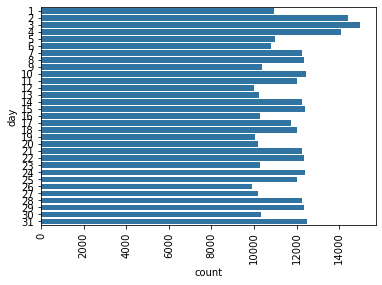

In [176]:
base_color = sb.color_palette()[0]
sb.countplot(data = flights_clean, y = 'day', color = base_color)
plt.xticks(rotation=90)
;

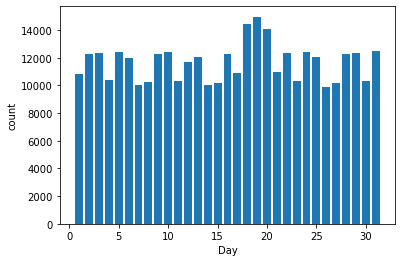

In [177]:
# Return the Series having unique values
x = flights_clean['day'].unique()

# Return the Series having frequency count of each unique value
y = flights_clean['day'].value_counts(sort=False)

plt.bar(x, y)

# Labeling the axes
plt.xlabel('Day')
plt.ylabel('count')

# Dsiplay the plot
plt.show()

In [188]:
base_color = sb.color_palette()[0]
sb.countplot(data = flights_clean, y = 'cancelled', color = base_color)
plt.xticks(rotation=90)
;

AttributeError: 'float' object has no attribute 'get'



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!



https://www.datasciencemadesimple.com/extract-last-n-characters-from-right-of-the-column-in-pandas-python/
https://stackoverflow.com/questions/26535563/querying-for-nan-and-other-names-in-pandas